Take input an image and convert it to a binary image


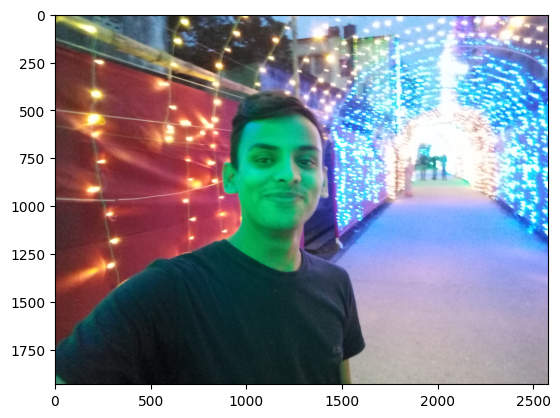

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/content/20191004_180325.jpg')
plt.imshow(img)

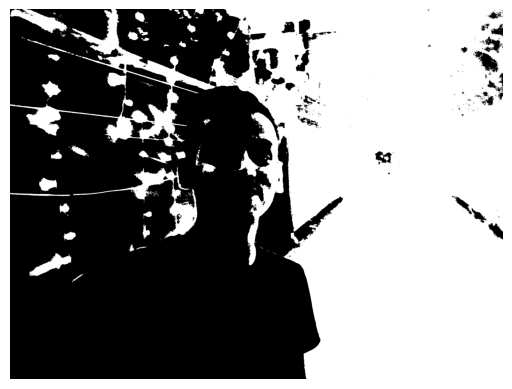

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('/content/20191004_180325.jpg')
gray_image = gray_image(img)
show_image(binary_image(gray_image))

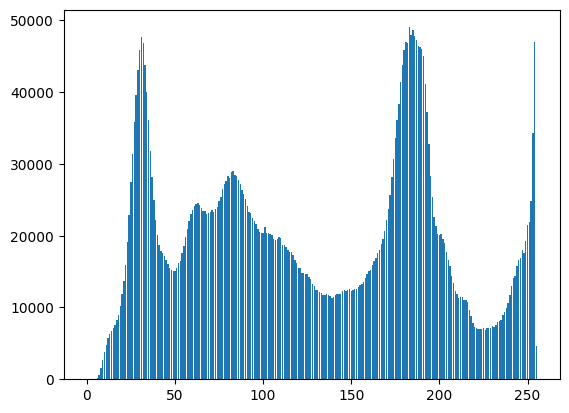

In [ ]:
#Histogram
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('/content/20191004_180325.jpg')
histrogram = gray_level_histrogram(gray_image(img))
plot_histrogram(histrogram)

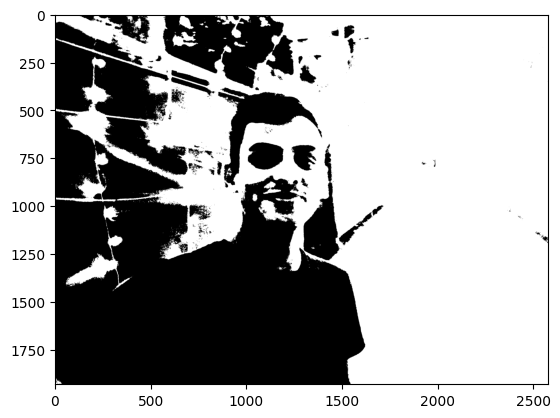

In [ ]:
#gray image
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/content/20191004_180325.jpg')
plt.imshow(img)

g_img = np.mean(img, axis=2).astype(np.uint8)
plt.imshow(g_img, cmap='gray')

T = 10
binary_img = np.zeros(g_img.shape)
for r in range(g_img.shape[0]):
    for c in range(g_img.shape[1]):
        if g_img[r,c] > T:
            binary_img[r,c] = 1

plt.imshow(binary_img, cmap='gray')



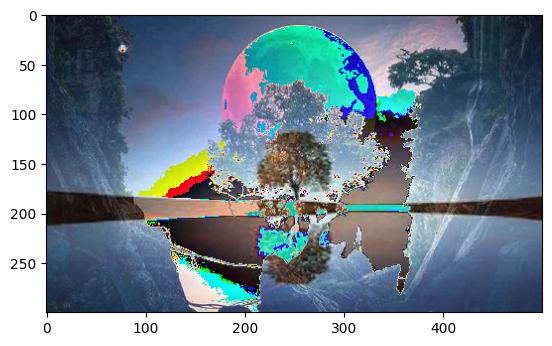

In [ ]:
#Add
import numpy as np
import matplotlib.pyplot as plt

img1 = plt.imread('1.jpg')
img2 = plt.imread('2.jpg')
# add two images
img3 = img1 + img2
plt.imshow(img3)

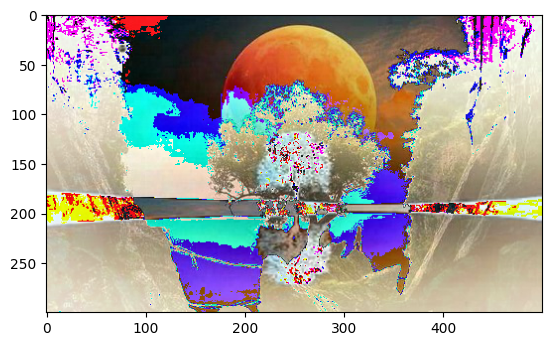

In [ ]:
img1 = plt.imread('1.jpg')
img2 = plt.imread('2.jpg')
img3 = img1 - img2
plt.imshow(img3)

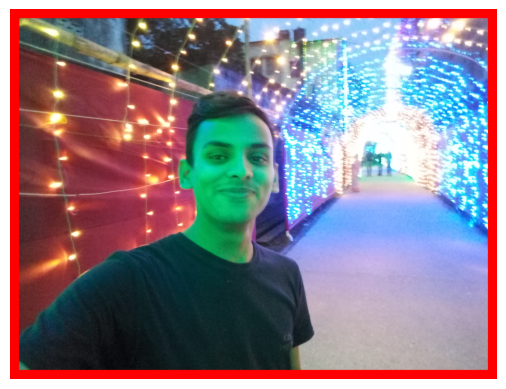

In [ ]:
#Image broder
import numpy as np
import matplotlib.pyplot as plt

# add padding to image
def add_padding(img, padding_size, color=0):
    """
    :param img: numpy array
    :param padding_size: int
    :param color: int
        :size 1: gray image 0-255
        :size 3: RGB image (0, 0, 0) - (255, 255, 255)
    :return: numpy array
    """
    # Gray image
    if len(img.shape) == 2:
        img_height, img_width = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    # RGB image
    elif len(img.shape) == 3:
        img_height, img_width, img_channel = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2, img_channel), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    return padded_img.astype(np.uint8)

def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img = plt.imread('/content/20191004_180325.jpg')
border_img = add_padding(img, 50, (255,0,0))
show_image(border_img)

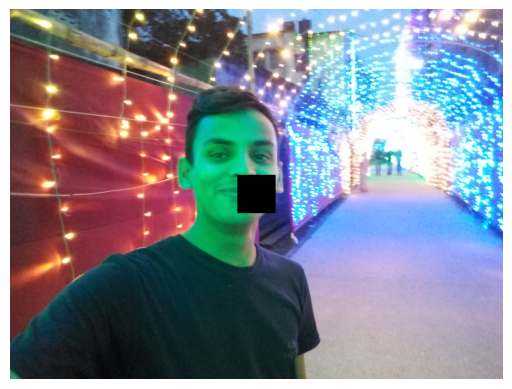

In [ ]:
#Center Point
import numpy as np
import matplotlib.pyplot as plt

def center_point(img, redius=5, color=(255,0,0)):
    """
    :param img: numpy array
    :param redius: int
    :param color: tuple
    :return: numpy array
    """
    img_height, img_width, img_channel = img.shape
    center_x = img_width // 2
    center_y = img_height // 2
    cp_img = img.copy()
    cp_img[center_y-redius:center_y+redius, center_x-redius:center_x+redius] = color
    return cp_img

def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img = plt.imread('/content/20191004_180325.jpg')
center_point_img = center_point(img, 100, (0,0,0))
show_image(center_point_img)

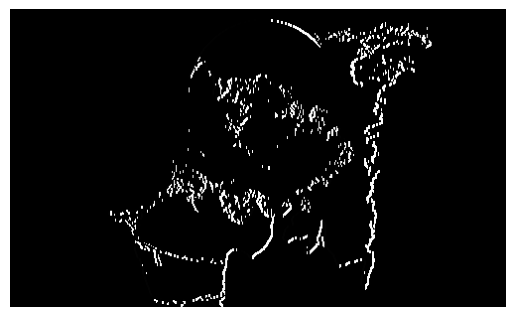

In [ ]:
#Line Detection
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# line detection using sobel filter
def sobel_filter(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])
    return new_img.astype(np.uint8)

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('1.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
line_img = sobel_filter(bin_img)


show_image(line_img)

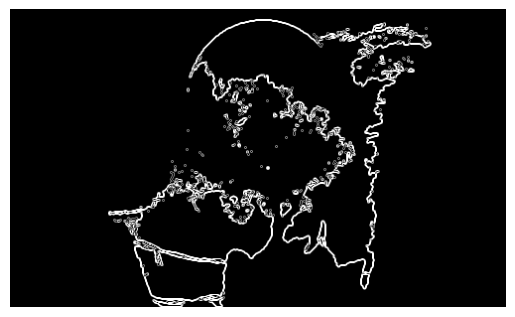

In [ ]:
# edge detection
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# edge detection
def edge_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    sobel_filter_y = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sqrt(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])**2 + np.sum(sobel_filter_y * padded_img[i:i + 3, j:j + 3])**2)
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('1.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
edge_img = edge_detection(bin_img)

show_image(edge_img)

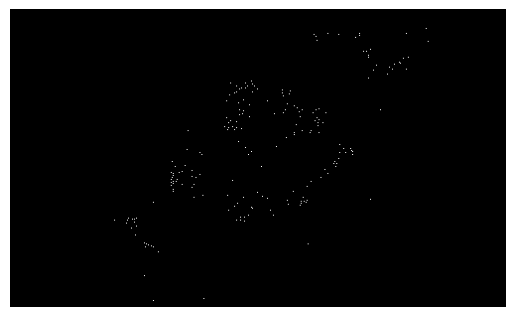

In [ ]:
# point detection
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# point detection
def point_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    sobel_filter_y = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.abs(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3]))
    threshold = np.max(new_img) * 0.8
    new_img[new_img < threshold] = 0
    new_img[new_img >= threshold] = 255
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('1.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
point_img = point_detection(bin_img)

show_image(point_img)

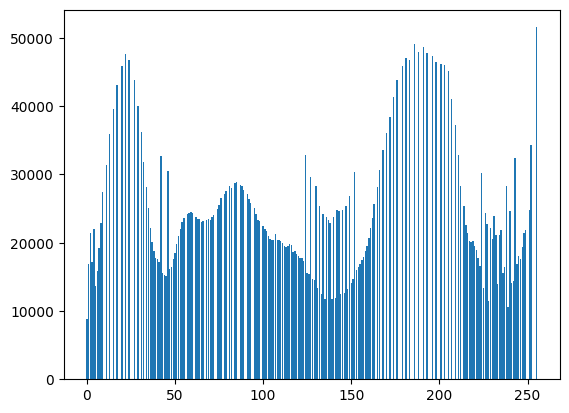

In [ ]:
# histogram equalization
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

# probability of gray level
def bit_prk(h):
    return h / np.sum(h)

# cumulative distribution function
def prk_cdf(prk):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(prk[:i+1])
    return cdf

# histogram equalization
def hist_equalization(cdf, nrk):
    hist_equalization_bit = np.round(cdf * 255).astype(np.uint8)
    hist_nrk = np.zeros(256)
    for i in range(256):
        hist_nrk[hist_equalization_bit[i]] += nrk[i]
    return hist_nrk


def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('/content/20191004_180325.jpg')
nrk = gray_level_histrogram(gray_image(img))
prk = bit_prk(nrk)
cdf = prk_cdf(prk)
new_img = hist_equalization(cdf, nrk)

plot_histrogram(new_img)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread('DE.png')
gray_image = np.mean(img, axis=-1).astype(np.uint8)
# binary_image = (gray_image > 127).astype(np.uint8)



In [ ]:
# Erosion
def erosion(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.max(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [ ]:
# dilation
def dilation(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.min(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [ ]:
# create subplot to show gray image, erosion and dilation
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(erosion(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Erosion')
    axs[2].imshow(dilation(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Dilation')
    plt.show()

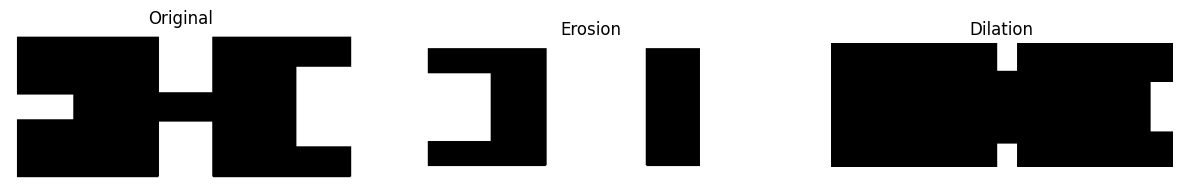

In [ ]:
kernel = np.ones((47, 47))
show_image(gray_image, kernel)

In [ ]:
# Opening
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

# Closing
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)


# create subplot to show gray image, opening and closing
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(opening(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Opening')
    axs[2].imshow(closing(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Closing')
    plt.show()

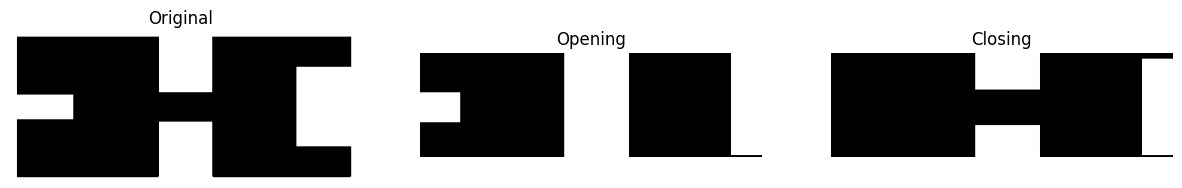

In [ ]:
kernel = np.ones((40, 40))
show_image(gray_image, kernel)